In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import k, Boltzmann

In [ ]:
Boltzmann

1.380649e-23

In [ ]:
size = 10
S = np.random.choice([-1, 1], size = (size + 2, size + 2))

<Axes: >

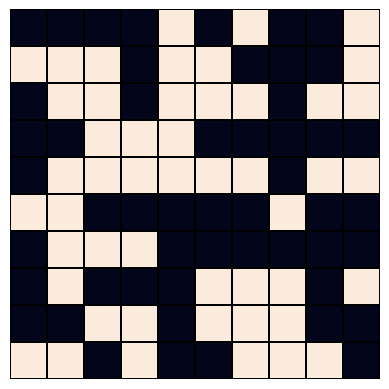

In [ ]:
sns.heatmap(S[1 : size + 1, 1 : size + 1],  cbar = False, square = True,
            xticklabels = False, yticklabels = False, linewidths = 0.01, linecolor = 'black')

In [ ]:
def energy(S, size, J):
    H = 0
    for i in range(1, size + 1):
        for j in range(1, size + 1):
            H += S[i][j] * (S[i + 1][j]  + S[i - 1][j]  + S[i][j + 1]  + S[i][j - 1])
    return -J * H

In [ ]:
def magnet(S, size):
    return sum(sum(S[1 : size + 1][1 : size + 1]))

In [ ]:
def change(S, size, T, J):
  H = energy(S, size, J)

  i = np.random.randint(1, size + 1)
  j = np.random.randint(1, size + 1)
  S[i, j] *= -1

  Hnew = energy(S, size, J)
  dH = Hnew - H

  if dH < 0 or np.exp(-dH/(T)) > np.random.uniform(0, 1):
    return S
  else:
      S[i, j] *= -1
      return S

In [ ]:
def means(size, T, J, n):
  S = np.random.choice([-1, 1], size = (size + 2, size + 2))
  magnets = []
  energies = []
  for i in range(n):
    S = change(S, size, T, J)
    magnets.append(magnet(S, size))
    energies.append(energy(S, size, J))
  return (S, np.mean(magnets), np.mean(energies))

In [ ]:
size = 10
n = 5000
J = 1
mean_magnets = []
mean_energies = []
temperature =  np.linspace(0.1, 10, num = 50)
for T in temperature:
  S, mean_magnet, mean_energy = means(size, T, J, n)
  mean_magnets.append(mean_magnet)
  print(mean_magnet, T)
  mean_energies.append(mean_energy)
plt.plot(temperature, mean_magnets)
plt.xlabel('Температура')
plt.ylabel('Средняя намагниченность')
plt.show()
plt.plot(temperature, mean_energies)
plt.xlabel('Температура')
plt.ylabel('Средняя энергия')
plt.show()

-0.72 0.1
0.84 0.3020408163265306
0.34 0.5040816326530613
0.94 0.7061224489795919
-0.12 0.9081632653061225
0.16 1.1102040816326533
-0.22 1.3122448979591839
0.9 1.5142857142857145
-0.68 1.716326530612245
0.88 1.9183673469387756
0.94 2.1204081632653065
-0.98 2.322448979591837
0.22 2.5244897959183676
-0.58 2.7265306122448982
0.4 2.928571428571429
0.58 3.1306122448979594
0.2 3.33265306122449
-0.82 3.5346938775510206
0.82 3.736734693877551
-0.86 3.938775510204082
0.46 4.140816326530612
-0.62 4.3428571428571425
0.46 4.544897959183674
0.06 4.746938775510204
-0.36 4.948979591836735
-0.04 5.151020408163265
-0.14 5.353061224489796
-0.14 5.555102040816326
-0.02 5.757142857142857
-0.26 5.959183673469387
0.08 6.161224489795918
-0.04 6.3632653061224485
0.12 6.5653061224489795
0.24 6.7673469387755105
-0.68 6.969387755102041
0.06 7.171428571428572
0.34 7.373469387755102
0.08 7.575510204081633
0.08 7.777551020408163
-0.38 7.979591836734694


KeyboardInterrupt: ignored

T =  0.1


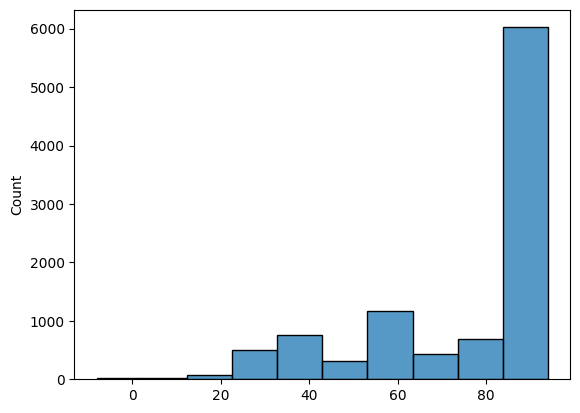

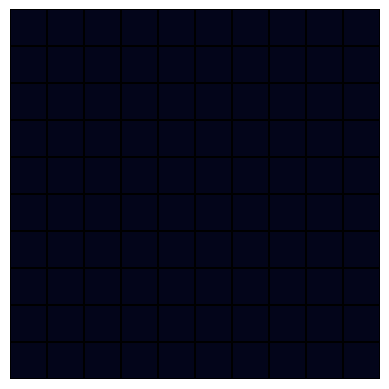

T =  5


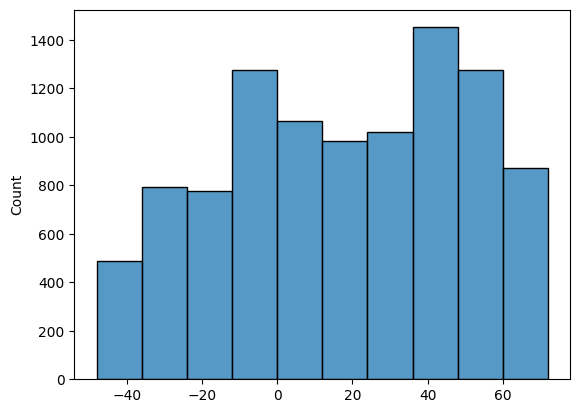

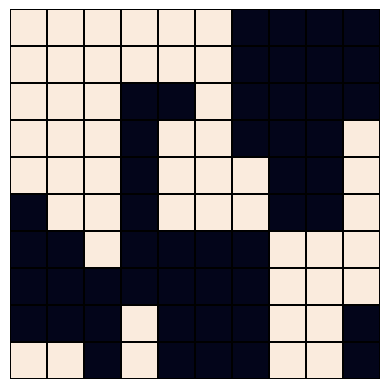

T =  50


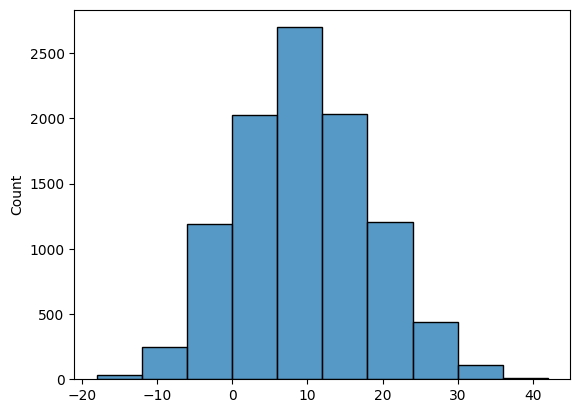

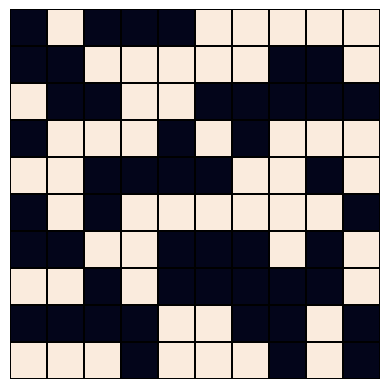

In [ ]:
size = 10
n = 10000
J = 1
for T in [0.1, 5, 50]:
    S = np.random.choice([-1, 1], size = (size + 2, size + 2))
    magnets = []
    for i in range(n):
      S = change(S, size, T, J)
      magnets.append(magnet(S, size))
    print('T = ', T)
    sns.histplot(magnets, bins = 10)
    plt.show()
    sns.heatmap(S[1 : size + 1, 1 : size + 1],  cbar = False, square = True,
            xticklabels = False, yticklabels = False, linewidths = 0.01, linecolor = 'black')
    plt.show()